In [31]:
import numpy as np
import matplotlib.pyplot as plt
from utils import creer_trajectoire, creer_observations, filtre_de_kalman, filtre_de_kalman_iter, reg_lin_cache, reg_lin_couple
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error as RMSE

# Partie 1: Systèmes linéaires gaussiens cachés

## Question 1:
Les équations du filtre de Kalman pour passer de $ \hat{x}_{n|n} $ et $ P_{n|n} $ à $ \hat{x}_{n+1|n+1} $ et $ P_{n+1|n+1} $ sont les suivantes :

$ \hat{x}_{n+1|n} = F_n \hat{x}_{n|n} $

$ P_{n+1|n} = F_n P_{n|n} F_n^T + Q $

$ K_{n+1} = P_{n+1|n} H_{n+1}^T (H_{n+1} P_{n+1|n} H_{n+1}^T + R)^{-1} $

$ \hat{x}_{n+1|n+1} = \hat{x}_{n+1|n} + K_{n+1} (y_{n+1} - H_{n+1} \hat{x}_{n+1|n}) $

$ P_{n+1|n+1} = (I - K_{n+1} H_{n+1}) P_{n+1|n} $



## Question 2

In [32]:

# Initialisation des paramètres
Te = 1
N = 100
sigma_Q = 1
sigma_px = 30
sigma_py = 30

# Matrices F, Q, H et R
F = np.array([[1, Te, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, Te],
              [0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

Q = sigma_Q**2 * np.array([[Te**3/3, Te**2/2, 0, 0],
                           [Te**2/2, Te, 0, 0],
                           [0, 0, Te**3/3, Te**2/2],
                           [0, 0, Te**2/2, Te]])

R = np.array([[sigma_px**2, 0],
              [0, sigma_py**2]])

# Initialisation des états
x_init = np.array([3, 40, -4, 20])
x_kalm = x_init
P_kalm = np.eye(4)

## Question 3

In [33]:
# Générer une trajectoire et ses observations bruitées
x = creer_trajectoire(F, Q, N, x_init)
y = creer_observations(H, R, x)

## Question 4

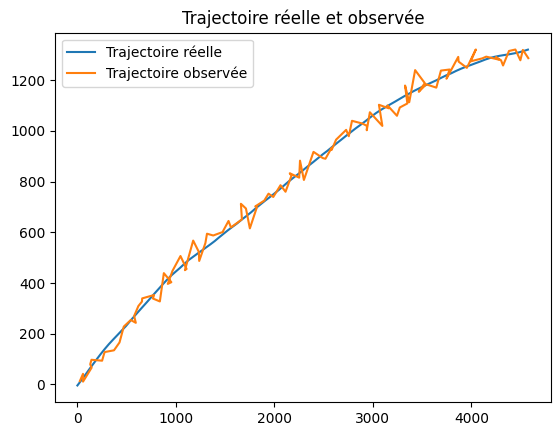

In [34]:
# Tracer la trajectoire réelle et observée
plt.figure()
plt.plot(x[:, 0], x[:, 2], label='Trajectoire réelle')
plt.plot(y[:, 0], y[:, 1], label='Trajectoire observée')
plt.legend()
plt.title('Trajectoire réelle et observée')
plt.show()

## Question 5

In [35]:
# Appliquer le filtre de Kalman
x_est, P_est = filtre_de_kalman(F, Q, H, R, y, x_init)

## Question 6

In [36]:
# Calcul des erreurs
err_MSE = MSE(x, x_est)
err_RMSE = RMSE(x, x_est)
print(f'Erreur MSE: {err_MSE}')
print(f'Erreur RMSE: {err_RMSE}')

Erreur MSE: 114.5546628240381
Erreur RMSE: 8.575292424835599


## Question 7

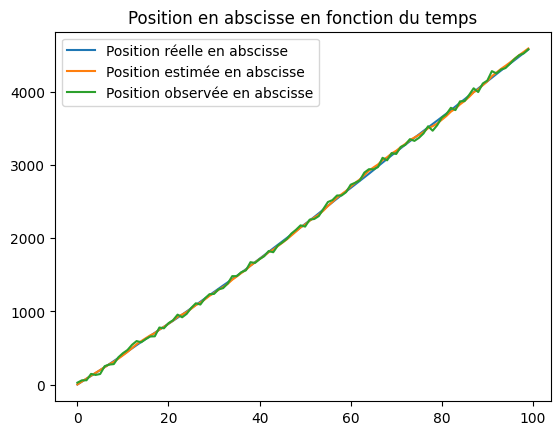

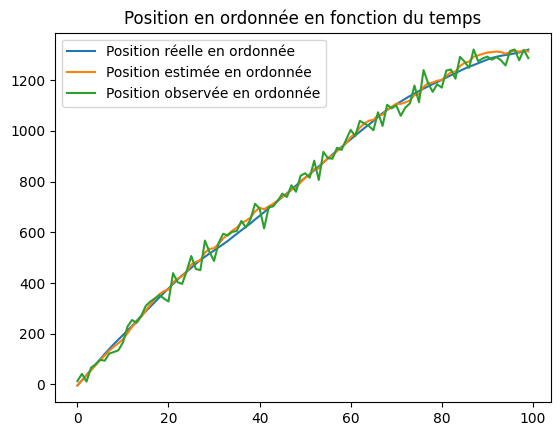

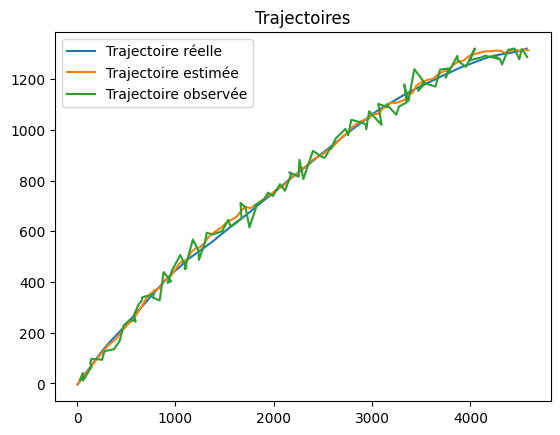

In [37]:
# Tracer les positions en fonction du temps
time = np.arange(N)
plt.figure()
plt.plot(time, x[:, 0], label='Position réelle en abscisse')
plt.plot(time, x_est[:, 0], label='Position estimée en abscisse')
plt.plot(time, y[:, 0], label='Position observée en abscisse')
plt.legend()
plt.title('Position en abscisse en fonction du temps')
plt.show()

plt.figure()
plt.plot(time, x[:, 2], label='Position réelle en ordonnée')
plt.plot(time, x_est[:, 2], label='Position estimée en ordonnée')
plt.plot(time, y[:, 1], label='Position observée en ordonnée')
plt.legend()
plt.title('Position en ordonnée en fonction du temps')
plt.show()

plt.figure()
plt.plot(x[:, 0], x[:, 2], label='Trajectoire réelle')
plt.plot(x_est[:, 0], x_est[:, 2], label='Trajectoire estimée')
plt.plot(y[:, 0], y[:, 1], label='Trajectoire observée')
plt.legend()
plt.title('Trajectoires')
plt.show()


# Partie 3: Filtrage de Kalman couple

## Question 8

## Système linéaire gaussien caché

Le système linéaire gaussien caché est défini par les équations suivantes :

$ X_{n+1} = F_n X_n + U_{n+1} $

$ Y_{n+1} = H_{n+1} X_{n+1} + V_{n+1} $

où :

$ X_n $ est l'état caché à l'instant $ n $,

$ Y_n $ est l'observation à l'instant $ n $,

$ F_n $ est la matrice de transition d'état,

$ H_{n+1} $ est la matrice d'observation,

$ U_{n+1} \sim N(0, Q) $ est le bruit de processus,

$ V_{n+1} \sim N(0, R) $ est le bruit d'observation.

## Modèle couple

Le modèle couple est défini par l'équation suivante :

$ \begin{pmatrix} X_{n+1} \\ Y_{n+1} \end{pmatrix} = A_n \begin{pmatrix} X_n \\ Y_n \end{pmatrix} + B_n \begin{pmatrix} U_{n+1} \\ V_{n+1} \end{pmatrix} $

où :

$ A_n $ et $ B_n $ sont les matrices de transition et de contrôle du bruit respectivement,

$ U_{n+1} $ et $ V_{n+1} $ sont les bruits de processus et d'observation.

## Correspondance des matrices

Pour montrer que le système linéaire gaussien caché est un cas particulier du modèle couple, nous devons choisir les matrices $ A_n $ et $ B_n $ de manière appropriée :

### Matrice $ A_n $ :

$ A_n = \begin{pmatrix} F_n & 0_{4 \times 2} \\ H_{n+1} F_n & 0_{2 \times 2} \end{pmatrix} $

Cette matrice $ A_n $ permet de coupler l'évolution des états $ X_n $ et $ Y_n $ dans une seule équation.

### Matrice $ B_n $ :

$ B_n = \begin{pmatrix} I_{4 \times 4} & 0_{4 \times 2} \\ H_{n+1} & I_{2 \times 2} \end{pmatrix} $

Cette matrice $ B_n $ intègre les bruits $ U_{n+1} $ et $ V_{n+1} $ dans le modèle couple.

## Vérification

Pour vérifier que ces matrices fonctionnent, nous pouvons écrire les équations résultantes du modèle couple avec les matrices choisies :

$ \begin{pmatrix} X_{n+1} \\ Y_{n+1} \end{pmatrix} = \begin{pmatrix} F_n & 0_{4 \times 2} \\ H_{n+1} F_n & 0_{2 \times 2} \end{pmatrix} \begin{pmatrix} X_n \\ Y_n \end{pmatrix} + \begin{pmatrix} I_{4 \times 4} & 0_{4 \times 2} \\ H_{n+1} & I_{2 \times 2} \end{pmatrix} \begin{pmatrix} U_{n+1} \\ V_{n+1} \end{pmatrix} $

Cela donne deux équations séparées :

$ X_{n+1} = F_n X_n + U_{n+1} $

$ Y_{n+1} = H_{n+1} F_n X_n + H_{n+1} U_{n+1} + V_{n+1} = H_{n+1} X_{n+1} + V_{n+1} $

Ces équations correspondent exactement aux équations du modèle linéaire gaussien caché, montrant ainsi que ce modèle est un cas particulier du modèle couple avec les matrices $ A_n $ et $ B_n $ définies comme ci-dessus.


## Question 9

In [38]:
# Initialisation pour le filtre de Kalman couple
c = 1
S = np.block([
    [Q, np.zeros((4, 2))],
    [np.zeros((2, 4)), R]
])

A = np.block([
    [F, np.zeros((4, 2))],
    [H @ F, c * np.eye(2)]
])

B = np.block([
    [np.eye(4), np.zeros((4, 2))],
    [H, np.eye(2)]
])

y_init = H @ x_init + np.random.multivariate_normal([0, 0], R)

## Question 10

In [39]:
# Générer une trajectoire et ses observations pour le filtre de Kalman couple
def creer_trajectoire_observations(A, B, S, x_init, y_init, N):
    x = np.zeros((N, 4))
    y = np.zeros((N, 2))
    x[0, :] = x_init
    y[0, :] = y_init

    for n in range(1, N):
        W = np.random.multivariate_normal(np.zeros(6), S)
        state = np.concatenate((x[n-1, :], y[n-1, :]))
        next_state = A @ state + B @ W

        x[n, :] = next_state[:4]
        y[n, :] = next_state[4:]

    return x, y

x_couple, y_couple = creer_trajectoire_observations(A, B, S, x_init, y_init, N)


## Question 11

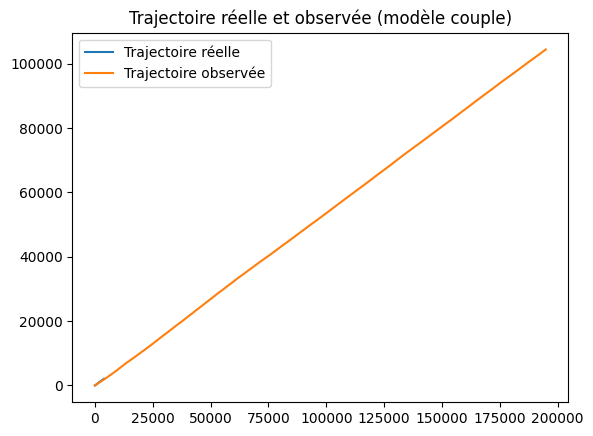

In [40]:
# Tracer la trajectoire réelle et observée pour le modèle couple
plt.figure()
plt.plot(x_couple[:, 0], x_couple[:, 2], label='Trajectoire réelle')
plt.plot(y_couple[:, 0], y_couple[:, 1], label='Trajectoire observée')
plt.legend()
plt.title('Trajectoire réelle et observée (modèle couple)')
plt.show()

## Question 12 X

In [63]:
import numpy as np

def filtre_de_kalman_couple_iter(A, B, S, y_n, y_prec, x_kalmc_prec, P_kalmc_prec, R):
    # Combine the current and previous observations
    y_combined = np.concatenate((y_prec, y_n))
    
    # Prediction step
    x_pred = A @ np.concatenate((x_kalmc_prec, y_prec))
    P_pred = A @ P_kalmc_prec @ A.T + B @ S @ B.T

    # Correction step
    H_combined = np.block([[np.zeros((2, 4)), np.eye(2)]])
    K = P_pred @ H_combined.T @ np.linalg.inv(H_combined @ P_pred @ H_combined.T + R)

    x_kalmc_n = x_pred[:4] + K @ (y_n - H_combined.T @ x_pred[4:])
    P_kalmc_n = (np.eye(6) - K @ H_combined) @ P_pred

    return x_kalmc_n, P_kalmc_n[:4, :4]


In [67]:
x_init

array([ 3, 40, -4, 20])

## Question 13 X

In [64]:
def filtre_de_kalman_couple(A, B, S, R, y, x_init):
    N = y.shape[0]
    x_est = np.zeros((N, 4))
    P_est = np.zeros((N, 4, 4))
    
    y_prev = y[0, :]
    x_kalmc = x_init
    P_kalmc = np.eye(6)
    
    for n in range(1, N):
        x_kalmc, P_kalmc = filtre_de_kalman_couple_iter(A, B, S, y[n, :], y_prev, x_kalmc, P_kalmc, R)
        x_est[n, :] = x_kalmc
        P_est[n, :, :] = P_kalmc
        y_prev = y[n, :]

    return x_est, P_est


In [65]:
# Générer les observations
x_couple, y_couple = creer_trajectoire_observations(A, B, S, x_init, y_init, N)

# Appliquer le filtre de Kalman couple
x_est_couple, P_est_couple = filtre_de_kalman_couple(A, B, S, R, y_couple, x_init)


ValueError: operands could not be broadcast together with shapes (2,) (6,) 

## Question 14 X

## Question 15 X

# Partie 4: Comparaison des deux modèles

## Question 16

In [47]:
# Question 16: Générer une trajectoire et une observation selon le modèle caché
x_cache = creer_trajectoire(F, Q, N, x_init)
y_cache = creer_observations(H, R, x_cache)

## Question 17

In [48]:
# Question 17: Utiliser le filtre de Kalman pour retrouver la trajectoire à partir des observations
x_est_cache, P_est_cache = filtre_de_kalman(F, Q, H, R, y_cache, x_init)

## Question 18

In [50]:
# Question 18: Estimer A et B_prime, paramètres du couple
A_est, B_prime_est = reg_lin_couple(x_cache, y_cache)
print("Matrice A estimée:")
print(A_est)
print("Matrice B_prime estimée:")
print(B_prime_est)

Matrice A estimée:
[[ 9.99495261e-01  9.81392832e-01  1.42615147e-03  2.62072006e-02
   1.75809700e-04 -1.16679964e-03]
 [-1.64248317e-03  9.67155138e-01  2.92732049e-03  5.91899479e-02
   4.57602351e-04 -1.98220750e-03]
 [-6.61716557e-04  4.92371178e-02  9.98757996e-01  8.85364172e-01
   3.51605698e-03 -1.02843731e-03]
 [-1.15258077e-03  8.83420161e-02 -1.34523740e-03  8.15152215e-01
   5.11893364e-03 -1.69102678e-03]
 [ 1.04460931e+00 -9.67983280e-02  1.38979128e-01  1.16852454e+00
  -8.31378616e-03 -1.89246787e-01]
 [ 1.29041250e-01  9.47788498e-01  8.68841310e-01 -1.96765950e+00
  -2.26384628e-02  3.64449592e-02]]
Matrice B_prime estimée:
[[ 0.5548472   0.          0.          0.          0.          0.        ]
 [ 0.86889671  0.5210148   0.          0.          0.          0.        ]
 [ 0.12634271 -0.08280874  0.55014099  0.          0.          0.        ]
 [ 0.23620584 -0.07439496  0.83475577  0.48422198  0.          0.        ]
 [ 5.75363497  0.41359373  3.41267389  2.52211184

## Question 19 X

In [52]:
# Question 19: Utiliser le filtre de Kalman couple pour retrouver la trajectoire à partir des observations
B_est = B_prime_est.T
S_est = np.eye(6)

x_est_couple_from_cache, P_est_couple_from_cache = filtre_de_kalman_couple(A_est, B_est, S_est, y_cache, x_init)


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

## Question 20 X

In [51]:
# Question 20: Afficher et comparer les trajectoires estimées obtenues avec la trajectoire générée
err_RMSE_cache = RMSE(x_cache, x_est_cache)
err_RMSE_couple_from_cache = RMSE(x_cache, x_est_couple_from_cache)
print(f'Erreur RMSE (modèle caché): {err_RMSE_cache}')
print(f'Erreur RMSE (modèle couple à partir du caché): {err_RMSE_couple_from_cache}')

# Tracer les trajectoires
plt.figure()
plt.plot(x_cache[:, 0], x_cache[:, 2], label='Trajectoire réelle (caché)')
plt.plot(x_est_cache[:, 0], x_est_cache[:, 2], label='Trajectoire estimée (Kalman caché)')
plt.plot(x_est_couple_from_cache[:, 0], x_est_couple_from_cache[:, 2], label='Trajectoire estimée (Kalman couple)')
plt.legend()
plt.title('Comparaison des trajectoires estimées (modèle caché)')
plt.show()


NameError: name 'x_est_couple_from_cache' is not defined

## Question 21

In [53]:
# Question 21: Générer une trajectoire et une observation selon le modèle couple
x_couple, y_couple = creer_trajectoire_observations(A, B, S, x_init, y_init, N)


## Question 22

In [54]:
# Question 22: Estimer F, Q, H, B, paramètres du caché
F_est, Q_est, H_est, R_est = reg_lin_cache(x_couple, y_couple)
print("Matrice F estimée:")
print(F_est)
print("Matrice Q estimée:")
print(Q_est)
print("Matrice H estimée:")
print(H_est)
print("Matrice R estimée:")
print(R_est)


Matrice F estimée:
[[ 1.00002881e+00  9.93904689e-01 -1.56880697e-04  2.00274361e-02]
 [-8.59441000e-05  9.81865397e-01  2.20588655e-04  5.46204440e-02]
 [ 1.15975724e-03  6.58485378e-03  9.96506231e-01  9.91211646e-01]
 [ 2.06958486e-03  1.57668329e-02 -6.29239250e-03  9.75079626e-01]]
Matrice Q estimée:
[[0.38345277 0.59426022 0.0410559  0.08382707]
 [0.59426022 1.25161421 0.10156324 0.18265781]
 [0.0410559  0.10156324 0.36361464 0.5966349 ]
 [0.08382707 0.18265781 0.5966349  1.16756079]]
Matrice H estimée:
[[   93.01305033 -1511.9559528   -131.61986912  2548.93794257]
 [   31.59163695  -446.85887856   -42.01663019   708.37855312]]
Matrice R estimée:
[[1.27831977e+08 4.03035705e+07]
 [4.03035705e+07 1.27674428e+07]]


## Question 23 X

In [55]:
# Question 23: Estimer la trajectoire avec le filtre de Kalman couple et le filtre de Kalman caché
x_est_couple_with_true_params, P_est_couple_with_true_params = filtre_de_kalman_couple(A, B, S, y_couple, x_init)
x_est_cache_with_est_params, P_est_cache_with_est_params = filtre_de_kalman(F_est, Q_est, H_est, R_est, y_couple, x_init)


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

## Question 24 X

In [56]:
# Question 24: Reprendre toute l'étude en faisant varier les bruits et comparer les modèles
sigma_Q_values = [0.5, 1, 2]
sigma_px_values = [15, 30, 60]
sigma_py_values = [15, 30, 60]

for sigma_Q in sigma_Q_values:
    for sigma_px in sigma_px_values:
        for sigma_py in sigma_py_values:
            Q_varied = sigma_Q**2 * np.array([[Te**3/3, Te**2/2, 0, 0],
                                              [Te**2/2, Te, 0, 0],
                                              [0, 0, Te**3/3, Te**2/2],
                                              [0, 0, Te**2/2, Te]])
            R_varied = np.array([[sigma_px**2, 0],
                                 [0, sigma_py**2]])
            
            # Générer une nouvelle trajectoire et observations
            x_cache_varied = creer_trajectoire(F, Q_varied, N, x_init)
            y_cache_varied = creer_observations(H, R_varied, x_cache_varied)
            
            # Estimer les trajectoires
            x_est_cache_varied, _ = filtre_de_kalman(F, Q_varied, H, R_varied, y_cache_varied, x_init)
            A_est_varied, B_prime_est_varied = reg_lin_couple(x_cache_varied, y_cache_varied)
            B_est_varied = B_prime_est_varied.T
            S_est_varied = np.eye(6)
            x_est_couple_varied, _ = filtre_de_kalman_couple(A_est_varied, B_est_varied, S_est_varied, y_cache_varied, x_init)
            
            # Calcul des erreurs
            err_RMSE_cache_varied = RMSE(x_cache_varied, x_est_cache_varied)
            err_RMSE_couple_varied = RMSE(x_cache_varied, x_est_couple_varied)
            
            # Affichage des résultats
            print(f'Sigma_Q: {sigma_Q}, Sigma_px: {sigma_px}, Sigma_py: {sigma_py}')
            print(f'Erreur RMSE (modèle caché): {err_RMSE_cache_varied}')
            print(f'Erreur RMSE (modèle couple): {err_RMSE_couple_varied}')

            # Tracer les trajectoires pour le cas varié
            plt.figure()
            plt.plot(x_cache_varied[:, 0], x_cache_varied[:, 2], label='Trajectoire réelle (caché)')
            plt.plot(x_est_cache_varied[:, 0], x_est_cache_varied[:, 2], label='Trajectoire estimée (Kalman caché)')
            plt.plot(x_est_couple_varied[:, 0], x_est_couple_varied[:, 2], label='Trajectoire estimée (Kalman couple)')
            plt.legend()
            plt.title(f'Comparaison des trajectoires estimées (sigma_Q={sigma_Q}, sigma_px={sigma_px}, sigma_py={sigma_py})')
            plt.show()


ValueError: operands could not be broadcast together with shapes (4,) (2,) 